In [1]:
!pip install opencv-python==4.6.0
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9

ERROR: Could not find a version that satisfies the requirement opencv-python==4.6.0 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78, 4.9.0.80)
ERROR: No matching distribution found for opencv-python==4.6.0
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 te

In [2]:
import pytesseract
import numpy as np
import cv2
import re
import matplotlib.pyplot as plt

from PIL import ImageFont, ImageDraw, Image
from pytesseract import Output
from google.colab.patches import cv2_imshow

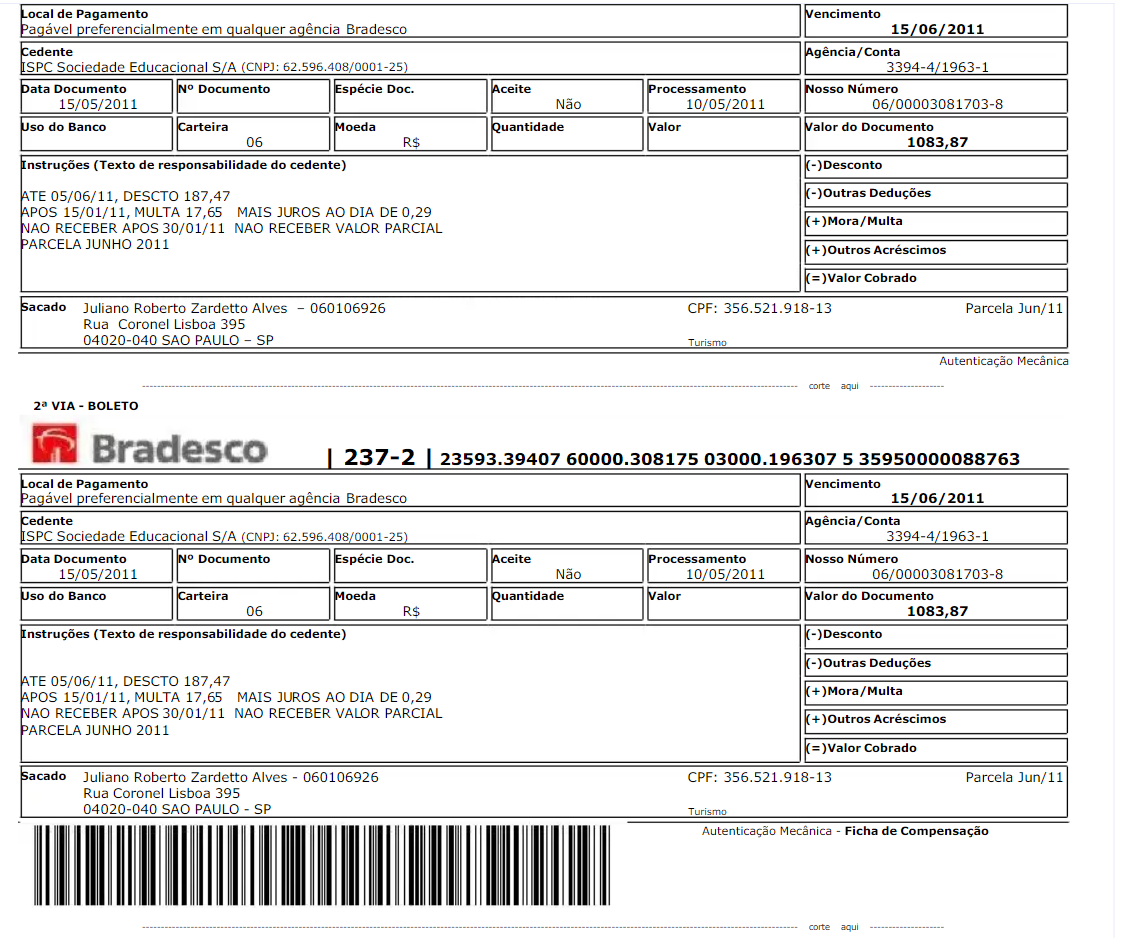

In [3]:
caminho = '/content/boleto_exemplo.png'
imagem_boleto = cv2.imread(caminho)
cv2_imshow(imagem_boleto)

In [4]:
texto = pytesseract.image_to_string(imagem_boleto)

In [5]:
print(texto)

 

[ocal de Pagamento
agavel preferencialmente em qualquer agéncia Bradesco

jencimento

15/06/2011

 

dente
ese Sociedade Educacional S/A (CNP): 62.596.408/0001-25)

Agéncia/Conta
3394-4/1963-1

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

POS 15/01/11, MULTA 17,65 MAIS JUROS AO DIA DE 0,29
|AO RECEBER APOS 30/01/11 NAO RECEBER VALOR PARCIAL,
ARCELA JUNHO 2011

hrs 05/06/11, DESCTO 187,47

Documento Ine Documento Espécie Doc. Aceite Processamento JNosso Numero
15/05/2011 Nao 10/05/2011 06/00003081703-8
Piso do Banco [carteira Moeda Ruantidade Valor Valor do Documento
06 RS 1083,87
[instrucées (Texto de responsabilidade do cedente)

 

[P|sconto
[E.valorcobrado

 

facade Juliano Roberto Zardetto Alves — 060106926
Rua Coronel Lisboa 395
04020-040 SAO PAULO - SP

CPF: 356.521.918-13

Turismo.

Parcela Jun/11

 

2° VIA- BOLETO

fi Bradesco

 

|_ 237-2 | 23593.39407 60000.308175 03000.196307 5 35950000088763

‘Autenticaggo Mecanica

cone agul

 

 

focal de Pagamento
agavel prefere

In [6]:
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

--2024-03-21 22:33:41--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2024-03-21 22:33:41--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2024-03-21 22:33:41--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

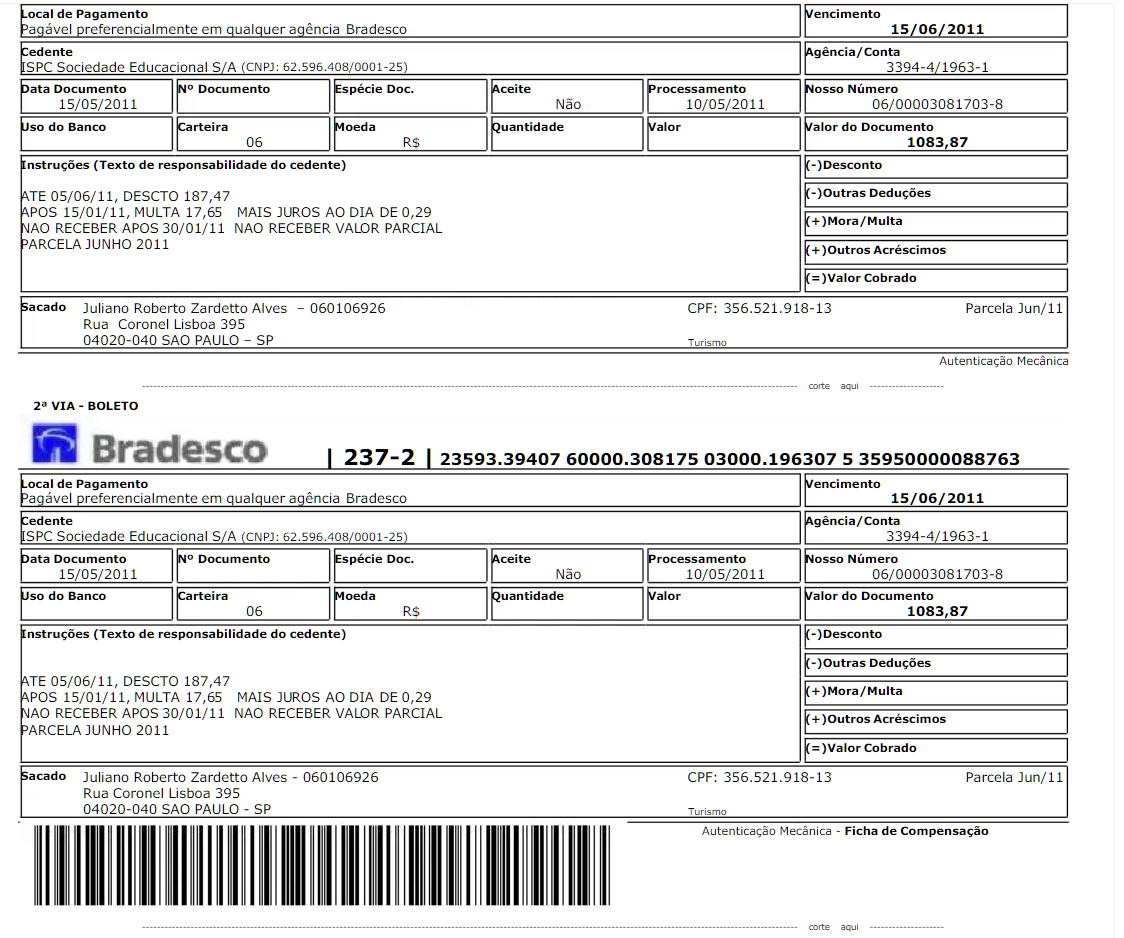

In [7]:
rgb = cv2.cvtColor(imagem_boleto, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [26]:
from pytesseract import Output

imagem_cinza = cv2.cvtColor(imagem_boleto, cv2.COLOR_BGR2GRAY)

# Aplicar um filtro bilateral para suavizar a imagem preservando as bordas
imagem_suavizada = cv2.bilateralFilter(imagem_cinza, 9, 75, 75)

# Aplicar thresholding para criar uma imagem binária
_, imagem_thresh = cv2.threshold(imagem_suavizada, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# OCR
config_tesseract = '--tessdata-dir tessdata --oem 3 --psm 6'
resultado = pytesseract.image_to_data(imagem_thresh, config=config_tesseract, lang='por', output_type=Output.DICT)

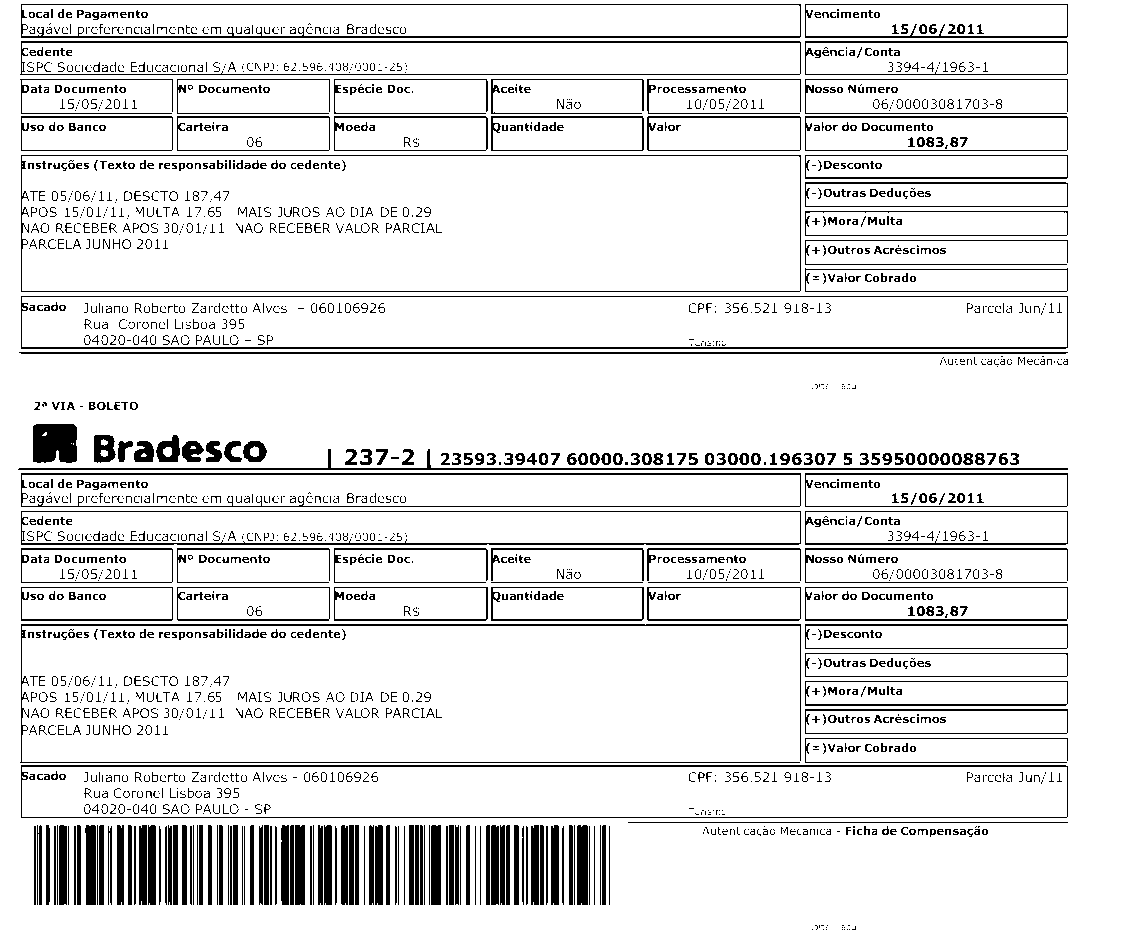

In [28]:
cv2_imshow(imagem_thresh)

In [21]:
def caixa_texto(resultado, img, cor = (255, 100, 0)):
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]

  cv2.rectangle(img, (x, y), (x+w, y+h), cor, 2)

  return x, y, img

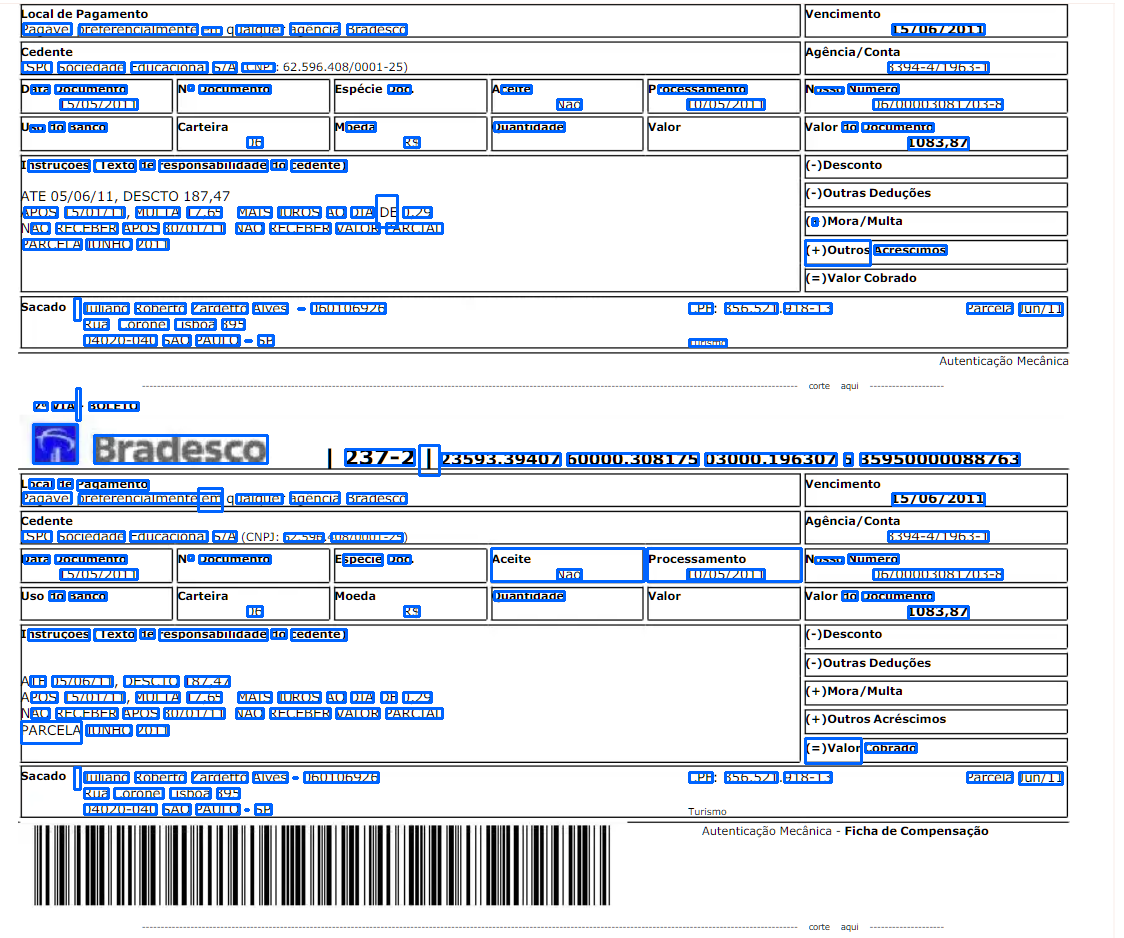

In [30]:
min_conf = 3 #@param {type: 'slider', min: 0, max: 100}
img_copia = rgb.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
cv2_imshow(img_copia)

In [31]:
resultado

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
 

In [36]:
config_tess = '--tessdata-dir /content/tessdata'
texto_extraido = pytesseract.image_to_string(imagem_thresh, lang='por', config=config_tess)
print(texto_extraido)

 

[ocal de Pagamento fencimento

 

 

 

 

 

 

 

agável preferencialmente cm qualquer agência Bradesco 15/06/2011
edente Jagência/Conta
SPC Sociedade Educacional S;A CNP): 62.596, 4980902 -25 3394-4/1963-1
Pata Documento |Nº Documento EEspécie Doc. ceite |Processamento —Nosso Número
15/05/2011 Não 10/05/2011 06/00003081703-8
1so do Banco arteira Moeda |[Ruantidade fator $alor do Documento
o Rs 1083,87

 

 

 

 

 

 

 

 

 

 

 

nstruções (Texto de responsabi

lade do cedente) [Dpesconto

ATE 05/06/11, DESCTO 187,47 [outras Deduções
|APOS 15/01/11, MULTA 17.65  MAIS JUROS AG DIA DE 0.29 T duora/mule

IÃO RECEBER APOS 30/01/11 NÃO RECEBER VALOR PARCIAL E ora/multa
ARCELA JUNHO 2011 [outros Acréscimos
[Ivalor cobrado

Eacado — Juliano Roberto Zardetto Alves - 060106926 CPF; 356.52] 918-13 Parcela Jun/11
Rua Coronel Lisboa 395
04020-040 SAC PAULO — SP

 

 

 

 

 

fucent cação Mecânca

2º VIA - BOLETO

. Brªdescº | 237-2 | 23593.39407 60000.308175 03000.196307 5 35950000088

In [50]:
import re

regex_data_bradesco = r'Bradesco\s+15/06/2011'
regex_valor = r'Rs \d+,\d{2}'
regex_cpf = r'\d{3}\.\d{3}\s?\d{3}-\d{2}'
regex_cnpj = r'\d{2}\.\d{3},\d{3}/\d{4}-\d{2}'
regex_documento = r'\d{5}\.\d{5}\s\d{5}\.\d{6}\s\d{5}\.\d{6}\s\d\s\d{14}'

datas_bradesco = re.findall(regex_data_bradesco, texto_extraido)
valores = re.findall(regex_valor, texto_extraido)
cpfs = re.findall(regex_cpf, texto_extraido)
cnpjs = re.findall(regex_cnpj, texto_extraido)
documentos = re.findall(regex_documento, texto_extraido)

print("Datas encontradas:", datas_bradesco)
print("Valores encontrados:", valores)
print("CPFs encontrados:", cpfs)
print("CNPJs encontrados:", cnpjs)
print("Números de documento (boleto) encontrados:", documentos)

Datas encontradas: ['Bradesco 15/06/2011', 'Bradesco 15/06/2011']
Valores encontrados: ['Rs 1083,87', 'Rs 1083,87']
CPFs encontrados: ['356.521 918-13']
CNPJs encontrados: ['62.596,498/0902-25']
Números de documento (boleto) encontrados: ['23593.39407 60000.308175 03000.196307 5 35950000088763']
